# Chapter 10: Sentiment Analysis
This document contains python code details related to the Sentiment Analysis chapter.



First, let's import useful libraries

In [1]:
import matplotlib.pylab as plt
#matplotlib inline
#plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex=True)
plt.rc('font', family='times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('font', size=12)

Installation requirements:

In [2]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 8.3 MB/s eta 0:00:00


Before starting is important to download the nltk corpora. You can download individual data packages or you can download the entire collection (using “all”). Useful corpora for this notebook include wordnet, movie_reviews, and stopwords.

In [3]:
import nltk
#nltk.download()
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Example 1:
Stemmer/lemmatizer example using NLTK

In [4]:
raw_docs = ["Here are some very simple basic sentences.", "They won't be very interesting, I'm afraid.", "The point of these examples is to _learn how basic text cleaning works_ on *very simple* data."]

from nltk.tokenize import word_tokenize
tokenized_docs = [word_tokenize(doc) for doc in raw_docs]

import re
import string
regex = re.compile('[%s]' % re.escape(string.punctuation))
tokenized_docs_no_punctuation = []
#tokenized_docs
for review in tokenized_docs:
    new_review = []
    for token in review:
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    tokenized_docs_no_punctuation.append(new_review)
tokenized_docs_no_punctuation


[['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentences'],
 ['They', 'wo', 'nt', 'be', 'very', 'interesting', 'I', 'm', 'afraid'],
 ['The',
  'point',
  'of',
  'these',
  'examples',
  'is',
  'to',
  'learn',
  'how',
  'basic',
  'text',
  'cleaning',
  'works',
  'on',
  'very',
  'simple',
  'data']]

In [5]:
tokenized_docs

[['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentences', '.'],
 ['They',
  'wo',
  "n't",
  'be',
  'very',
  'interesting',
  ',',
  'I',
  "'m",
  'afraid',
  '.'],
 ['The',
  'point',
  'of',
  'these',
  'examples',
  'is',
  'to',
  '_learn',
  'how',
  'basic',
  'text',
  'cleaning',
  'works_',
  'on',
  '*',
  'very',
  'simple',
  '*',
  'data',
  '.']]

In [6]:
tokenized_docs_no_punctuation

[['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentences'],
 ['They', 'wo', 'nt', 'be', 'very', 'interesting', 'I', 'm', 'afraid'],
 ['The',
  'point',
  'of',
  'these',
  'examples',
  'is',
  'to',
  'learn',
  'how',
  'basic',
  'text',
  'cleaning',
  'works',
  'on',
  'very',
  'simple',
  'data']]

In [7]:
import nltk
from nltk.tokenize import word_tokenize
import re
import string

nltk.download('punkt')
nltk.download('wordnet')

raw_docs = ["Here are some very simple basic sentences.", "They won't be very interesting, I'm afraid.", "The point of these examples is to _learn how basic text cleaning works_ on *very simple* data."]

tokenized_docs = [word_tokenize(doc) for doc in raw_docs]

regex = re.compile('[%s]' % re.escape(string.punctuation))
tokenized_docs_no_punctuation = []

for review in tokenized_docs:
    new_review = []
    for token in review:
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    tokenized_docs_no_punctuation.append(new_review)

from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

snowballed_docs = []
lemmatized_docs = []

for doc in tokenized_docs_no_punctuation:
    snowballed_doc = [snowball.stem(word) for word in doc]
    snowballed_docs.append(snowballed_doc)

    lemmatized_doc = [wordnet.lemmatize(word) for word in doc]
    lemmatized_docs.append(lemmatized_doc)

print("Snowballed Docs:")
print(snowballed_docs)

print("\nLemmatized Docs:")
print(lemmatized_docs)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Snowballed Docs:
[['here', 'are', 'some', 'veri', 'simpl', 'basic', 'sentenc'], ['they', 'wo', 'nt', 'be', 'veri', 'interest', 'i', 'm', 'afraid'], ['the', 'point', 'of', 'these', 'exampl', 'is', 'to', 'learn', 'how', 'basic', 'text', 'clean', 'work', 'on', 'veri', 'simpl', 'data']]

Lemmatized Docs:
[['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentence'], ['They', 'wo', 'nt', 'be', 'very', 'interesting', 'I', 'm', 'afraid'], ['The', 'point', 'of', 'these', 'example', 'is', 'to', 'learn', 'how', 'basic', 'text', 'cleaning', 'work', 'on', 'very', 'simple', 'data']]


These examples use functions of the modules "PorterStemmer", "SnowballStemmer", and "WordNetLemmatizer". Results of the three approaches are almost equivalent. Note that the script looks for all the items (words) in the list "tokenized\_docs\_no\_punctuation", and for each of them one of the different approaches can be considered. Note that the last two approaches of "SnowballStemmer" and "WordNetLemmatizer" require to install additional corpora from NLTK, that can be download by running "nltk.download()". In this example we are running the first approach "porter.stem(word)" adding the new stemmer or lemmatizer results of "word" in the new list "final\_doc" that is finally included in
"preprocessed\_docs".

Example 2: Word frequencies feature vector

In [8]:
mydoclist = ['Mireia loves me more than Hector loves me', 'Sergio likes me more than Mireia loves me', 'He likes basketball more than footbal']
from collections import Counter
for doc in mydoclist:
    tf = Counter()
    for word in doc.split():
        tf[word] +=1
    print (tf.items())

def build_lexicon(corpus):  # define a set with all possible words included
                            # in all the sentences or "corpus"
    lexicon = set()
    for doc in corpus:
        lexicon.update([word for word in doc.split()])
    return lexicon
def tf(term, document):
    return freq(term, document)
def freq(term, document):
    return document.split().count(term)
vocabulary = build_lexicon(mydoclist)
doc_term_matrix = []
print ('Our vocabulary vector is [' + ', '.join(list(vocabulary)) + ']')
for doc in mydoclist:
    print ('The doc is "' + doc + '"')
    tf_vector = [tf(word, doc) for word in vocabulary]
    tf_vector_string = ', '.join(format(freq, 'd') for freq in tf_vector)
    print ('The tf vector for Document %d is [%s]' % ((mydoclist.index(doc)+1), tf_vector_string))
    doc_term_matrix.append(tf_vector)

print ('All combined, here is our master document term matrix: ')
print (doc_term_matrix)

dict_items([('Mireia', 1), ('loves', 2), ('me', 2), ('more', 1), ('than', 1), ('Hector', 1)])
dict_items([('Sergio', 1), ('likes', 1), ('me', 2), ('more', 1), ('than', 1), ('Mireia', 1), ('loves', 1)])
dict_items([('He', 1), ('likes', 1), ('basketball', 1), ('more', 1), ('than', 1), ('footbal', 1)])
Our vocabulary vector is [footbal, He, likes, basketball, Sergio, me, Hector, loves, than, Mireia, more]
The doc is "Mireia loves me more than Hector loves me"
The tf vector for Document 1 is [0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1]
The doc is "Sergio likes me more than Mireia loves me"
The tf vector for Document 2 is [0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1]
The doc is "He likes basketball more than footbal"
The tf vector for Document 3 is [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1]
All combined, here is our master document term matrix: 
[[0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1], [0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1]]


Based on the previous script, each document is in the same feature space, meaning that we
can represent the entire corpus in the same dimensional space
without having lost too much information. Once we have the data in
the same feature space, we can start applying some machine
learning methods: classifying, clustering, and so on. But
actually, we have a few problems. Words are not all equally
informative. If words appear too frequently in a single document,
they are going to muck up our analysis. We want to perform some
scaling of each of these term frequency vectors into something a
bit more representative.  In other words, we need to do some
vector normalizing. One possibility is to ensure that the L2 norm
of each vector is equal to 1.

Example 3: L2 Normalization

In [9]:
import math
import numpy as np
def l2_normalizer(vec):
    denom = np.sum([el**2 for el in vec])
    return [(el / math.sqrt(denom)) for el in vec]
doc_term_matrix_l2 = []
for vec in doc_term_matrix:
    doc_term_matrix_l2.append(l2_normalizer(vec))
print ( 'A regular old document term matrix: ')
print (np.matrix(doc_term_matrix))
print ('\nA document term matrix with row-wise L2 norms of 1:')
print( np.matrix(doc_term_matrix_l2))

A regular old document term matrix: 
[[0 0 0 0 0 2 1 2 1 1 1]
 [0 0 1 0 1 2 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 0 1]]

A document term matrix with row-wise L2 norms of 1:
[[0.         0.         0.         0.         0.         0.57735027
  0.28867513 0.57735027 0.28867513 0.28867513 0.28867513]
 [0.         0.         0.31622777 0.         0.31622777 0.63245553
  0.         0.31622777 0.31622777 0.31622777 0.31622777]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.         0.
  0.         0.         0.40824829 0.         0.40824829]]


You can see that we have scaled down the vectors so that each element is between [0, 1], without losing too much
valuable information.

Finally, we have a remaining task to perform. Just as not all words
are equally valuable within a document, not all words are
valuable across all documents.  We can try reweighting every word
by its inverse document frequency.

Example 4: Feature weighting

In [18]:
def numDocsContaining(word, doclist):
    doccount = 0
    for doc in doclist:
        if freq(word, doc) > 0:
            doccount +=1
    return doccount


In [17]:
def idf(word, doclist):
    n_samples = len(doclist)
    df = numDocsContaining(word, doclist)
    return np.log(n_samples / (float(df)) )
my_idf_vector = [idf(word, mydoclist) for word in vocabulary]
print ( 'Our vocabulary vector is [' + ', '.join(list(vocabulary)) + ']')
print ('The inverse document frequency vector is [' + ', '.join(format(freq, 'f') for freq in my_idf_vector) + ']')

Our vocabulary vector is [footbal, He, likes, basketball, Sergio, me, Hector, loves, than, Mireia, more]
The inverse document frequency vector is [1.098612, 1.098612, 0.405465, 1.098612, 1.098612, 0.405465, 1.098612, 0.405465, 0.000000, 0.405465, 0.000000]


Example 5: Film critics binary sentiment analysis recognition code

In this example we apply the whole sentiment analysis process to the Large Movie reviews
dataset (http://www.aclweb.org/anthology/P11-1015). This is one of the
largest public available data sets for sentiment analysis, which
includes more than 50.000 texts from movie reviews including the
ground truth annotation related to positive and negative movie
review. As a proof on concept for this example we use a subset of
the dataset consisting in about 10% of the data.

You can use the following commands in a Linux operating system to download the required data:

In [5]:
!wget http://ai.stanford.edu/~amaas//data/sentiment/aclImdb_v1.tar.gz

--2024-02-26 16:52:23--  http://ai.stanford.edu/~amaas//data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  15.2MB/s    in 8.1s    

2024-02-26 16:52:31 (9.90 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [11]:
!mkdir "files"
!mkdir "files/ch10"
!tar -xf aclImdb_v1.tar.gz -C files/ch10/
!mkdir "files/ch10/train"
!mkdir "files/ch10/train/pos2"
!mkdir "files/ch10/train/neg2"
!mkdir "files/ch10/test"
!mkdir "files/ch10/test/pos2"
!mkdir "files/ch10/test/neg2"

mkdir: cannot create directory ‘files’: File exists
mkdir: cannot create directory ‘files/ch10’: File exists
mkdir: cannot create directory ‘files/ch10/train’: File exists
mkdir: cannot create directory ‘files/ch10/train/pos2’: File exists
mkdir: cannot create directory ‘files/ch10/train/neg2’: File exists
mkdir: cannot create directory ‘files/ch10/test’: File exists
mkdir: cannot create directory ‘files/ch10/test/pos2’: File exists
mkdir: cannot create directory ‘files/ch10/test/neg2’: File exists


For windows systems, you can download the data here: http://ai.stanford.edu/~amaas/data/sentiment/
Within the compressed file you will find several film critics. Move them to the folder files/ch10/

Next lines of code will select a subset of the critics of the dataset to run the next example for binary sentiment analysis recognition.

In [12]:
import os
import shutil
files=5
count=0
for file in os.listdir("files/ch10/aclImdb/train/pos/"):
    if count > files:
        break
    if file.endswith(".txt"):
        os.rename('files/ch10/aclImdb/train/pos/' + file, 'files/ch10/train/pos2/' + file)
    count=count+1
count=0
for file in os.listdir("files/ch10/aclImdb/train/neg/"):
    if count > files:
        break
    if file.endswith(".txt"):
        os.rename('files/ch10/aclImdb/train/neg/' + file, 'files/ch10/train/neg2/' + file)
    count=count+1
count=0
for file in os.listdir("files/ch10/aclImdb/test/pos/"):
    if count > files:
        break
    if file.endswith(".txt"):
        os.rename('files/ch10/aclImdb/test/pos/' + file, 'files/ch10/test/pos2/' + file)
    count=count+1
count=0
for file in os.listdir("files/ch10/aclImdb/test/neg/"):
    if count > files:
        break
    if file.endswith(".txt"):
        os.rename('files/ch10/aclImdb/test/neg/' + file, 'files/ch10/test/neg2/' + file)
    count=count+1


And the next script will perform the whole training and testing procedure on the selected subset of the dataset.

In [13]:
import os
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.classify import NaiveBayesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from unidecode import unidecode
import time
import nltk
import string
import re

nltk.download('punkt')



def BoW():
    # Tokenizing text
    text_tokenized = [word_tokenize(doc) for doc in text]
    # Removing punctuation
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    tokenized_docs_no_punctuation = []
    for review in text_tokenized:
        new_review = []
        for token in review:
            new_token = regex.sub(u'', token)
            if not new_token == u'':
                new_review.append(new_token)
        tokenized_docs_no_punctuation.append(new_review)
    # Stemming and Lemmatizing
    porter = PorterStemmer()
    preprocessed_docs = []
    for doc in tokenized_docs_no_punctuation:
        final_doc = ''
        for word in doc:
            final_doc = final_doc + ' ' + porter.stem(word)
        preprocessed_docs.append(final_doc)
    return preprocessed_docs

print('Reading the training data positive')
text = []
for file in os.listdir("files/ch10/train/pos2/"):
    if file.endswith(".txt"):
        infile = open('files/ch10/train/pos2/' + file, 'r')
        text.append(unidecode(infile.read())) #.decode('utf-8')
        infile.close()
num_posTrain=len(text)

print('Reading the training data negative')

for file in os.listdir("files/ch10/train/neg2/"):
    if file.endswith(".txt"):
        infile = open('files/ch10/train/neg2/' + file, 'r')
        text.append(unidecode(infile.read())) #.decode('utf-8')
        infile.close()
num_Train=len(text)

print('Defining dictionaries')

preprocessed_docs=BoW()
# Computing TIDF word space
tfidf_vectorizer = TfidfVectorizer(min_df = 1)
trainData = tfidf_vectorizer.fit_transform(preprocessed_docs)

# Reading the test data

print('Reading the test data positive')

text = []
for file in os.listdir("files/ch10/test/pos2/"):
    if file.endswith(".txt"):
        infile = open('files/ch10/test/pos2/' + file, 'r')
        #text.append(unidecode(infile.read().decode('utf-8')))
        text.append(unidecode(infile.read()))
        infile.close()
num_posTest=len(text)

print('Reading the test data negative')

for file in os.listdir("files/ch10/test/neg2/"):
    if file.endswith(".txt"):
        infile = open('files/ch10/test/neg2/' + file, 'r')
        text.append(unidecode(infile.read())) #text.append(unidecode(infile.read().decode('utf-8')))
        infile.close()
num_Test=len(text)

print('Computing test feature vectors')
start_time = time.time()

preprocessed_docs=BoW()
testData = tfidf_vectorizer.transform(preprocessed_docs)

targetTrain = []
for i in range(0,num_posTrain):
    targetTrain.append(0)
for i in range(0,num_Train-num_posTrain):
    targetTrain.append(1)

targetTest = []
for i in range(0,num_posTest):
    targetTest.append(0)
for i in range(0,num_Test-num_posTest):
    targetTest.append(1)

print('Training and testing on training Naive Bayes')
start_time = time.time()

gnb = GaussianNB()
testData.todense()
y_pred = gnb.fit(np.asarray(trainData.todense()), targetTrain).predict(np.asarray(trainData.todense()))
print ("Number of mislabeled training points out of a total %d points : %d" % (trainData.shape[0],(targetTrain != y_pred).sum()))

print('Training and testing on test Naive Bayes')

y_pred = gnb.fit(np.asarray(trainData.todense()), targetTrain).predict(np.asarray(testData.todense()))
print ("Number of mislabeled test points out of a total %d points : %d" % (testData.shape[0],(targetTest != y_pred).sum()))

print('Training and testing on train with SVM')
clf = svm.SVC()
clf.fit(np.asarray(trainData.todense()), targetTrain)
y_pred = clf.predict(np.asarray(trainData.todense()))
print ("Number of mislabeled test points out of a total %d points : %d" % (trainData.shape[0],(targetTrain != y_pred).sum()))

print ('Testing on test with already trained SVM')
y_pred = clf.predict(np.asarray(testData.todense()))
print ("Number of mislabeled test points out of a total %d points : %d" % (testData.shape[0],(targetTest != y_pred).sum()))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Reading the training data positive
Reading the training data negative
Defining dictionaries
Reading the test data positive
Reading the test data negative
Computing test feature vectors
Training and testing on training Naive Bayes
Number of mislabeled training points out of a total 12 points : 0
Training and testing on test Naive Bayes
Number of mislabeled test points out of a total 12 points : 7
Training and testing on train with SVM
Number of mislabeled test points out of a total 12 points : 0
Testing on test with already trained SVM
Number of mislabeled test points out of a total 12 points : 4


The previous example uses one of the largest public available datasets for sentiment analysis, which
includes more than 50,000 texts from movie reviews including the
ground truth annotation related to positive and negative movie
reviews. As a proof on concept, for this example we use a subset of
the dataset consisting of about 30\% of the data. Previous code re-uses part of the previous examples for data cleaning,
reads training and test data from the folders as provided by the
authors of the dataset.

Example 6: Tweet binary sentiment analysis recognition code (see book chapter reference to download data)

Finally, let us see another simple example of sentiment analysis
based on tweets. Although there is some work using more
tweet data
(\url{http://www.sananalytics.com/lab/twitter-sentiment/}) here we
present a simple set of tweets which are analyzed as in the
previous example of movie reviews. The main code remains the same
except for the definition of the initial data.

In [14]:
def BoW():
    # Tokenizing text
    text_tokenized = [word_tokenize(doc) for doc in text]
    # Removing punctuation
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    tokenized_docs_no_punctuation = []
    for review in text_tokenized:
        new_review = []
        for token in review:
            new_token = regex.sub(u'', token)
            if not new_token == u'':
                new_review.append(new_token)
        tokenized_docs_no_punctuation.append(new_review)
    # Stemming and Lemmatizing
    porter = PorterStemmer()
    preprocessed_docs = []
    for doc in tokenized_docs_no_punctuation:
        final_doc = ''
        for word in doc:
            final_doc = final_doc + ' ' + porter.stem(word)
        preprocessed_docs.append(final_doc)
    return preprocessed_docs

text = ['I love this sandwich.', 'This is an amazing place!',
        'I feel very good about these beers.',
         'This is my best work.', 'What an awesome view', 'I do not like this restaurant',
         'I am tired of this stuff.', 'I can not deal with this', 'He is my sworn enemy!',
         'My boss is horrible.']

targetTrain = [0,0,0,0,0,1,1,1,1,1]
preprocessed_docs=BoW()
tfidf_vectorizer = TfidfVectorizer(min_df = 1)
trainData = tfidf_vectorizer.fit_transform(preprocessed_docs)

text = ['The beer was good.', 'I do not enjoy my job', 'I aint feeling dandy today',
        'I feel amazing!'
        ,'Gary is a friend of mine.', 'I can not believe I am doing this.']
targetTest = [0,1,1,0,0,1]
preprocessed_docs=BoW()
testData = tfidf_vectorizer.transform(preprocessed_docs)

gnb = GaussianNB()
testData.todense()
y_pred = gnb.fit(trainData.toarray(), targetTrain).predict(trainData.toarray())

print("Number of mislabeled training points out of a total %d points : %d" % (trainData.shape[0],(targetTrain != y_pred).sum()))

print('Training and testing on test Naive Bayes')

y_pred = gnb.fit(np.asarray(trainData.todense()), targetTrain).predict(np.asarray(testData.todense()))

print("Number of mislabeled test points out of a total %d points : %d" % (testData.shape[0],(targetTest != y_pred).sum()))

print('Training and testing on train with SVM')
clf = svm.SVC()

clf.fit(trainData.toarray(), targetTrain)
y_pred = clf.predict(trainData.toarray())

print("Number of mislabeled test points out of a total %d points : %d" % (trainData.shape[0],(targetTrain != y_pred).sum()))

print('Testing on test with already trained SVM')
y_pred = clf.predict(np.asarray(testData.todense()))

print("Number of mislabeled test points out of a total %d points : %d" % (testData.shape[0],(targetTest != y_pred).sum()))

Number of mislabeled training points out of a total 10 points : 0
Training and testing on test Naive Bayes
Number of mislabeled test points out of a total 6 points : 2
Training and testing on train with SVM
Number of mislabeled test points out of a total 10 points : 0
Testing on test with already trained SVM
Number of mislabeled test points out of a total 6 points : 2


Confusion Matrix for Training Data:
[[ 968   32]
 [   0 1000]]

Confusion Matrix for Test Data:
[[551 449]
 [388 612]]


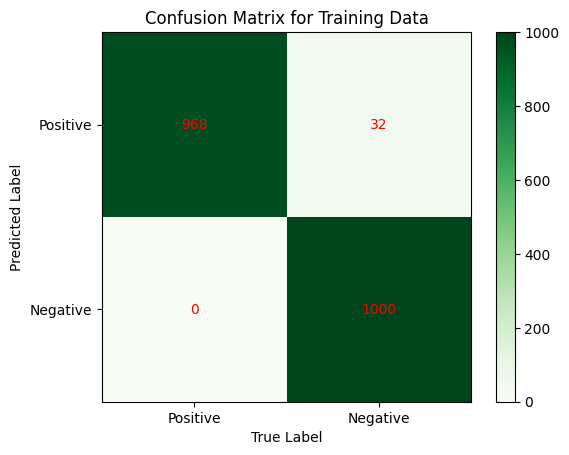

In [24]:
import os
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Function to preprocess the text data
def preprocess_text(text):
    porter = PorterStemmer()
    preprocessed_docs = []
    for doc in text:
        tokens = word_tokenize(doc)  # Tokenizing text
        tokens = [porter.stem(token) for token in tokens]  # Stemming
        preprocessed_docs.append(" ".join(tokens))
    return preprocessed_docs

# Read the entire dataset
def read_data(folder_path):
    text = []
    for file in os.listdir(folder_path):
        if file.endswith(".txt"):
            with open(os.path.join(folder_path, file), 'r', encoding='utf-8') as infile:
                text.append(infile.read())
    return text

train_pos_text = read_data("files/ch10/aclImdb/train/pos/")[:1000]
train_neg_text = read_data("files/ch10/aclImdb/train/neg/")[:1000]
test_pos_text = read_data("files/ch10/aclImdb/test/pos/")[:1000]
test_neg_text = read_data("files/ch10/aclImdb/test/neg/")[:1000]

# Combine positive and negative training data
train_text = train_pos_text + train_neg_text
# Combine positive and negative test data
test_text = test_pos_text + test_neg_text

# Labels for training data (0 for positive, 1 for negative)
target_train = [0] * len(train_pos_text) + [1] * len(train_neg_text)
# Labels for test data
target_test = [0] * len(test_pos_text) + [1] * len(test_neg_text)

# Preprocess the training and test data
preprocessed_train = preprocess_text(train_text)
preprocessed_test = preprocess_text(test_text)

# Convert text data to TF-IDF feature vectors
tfidf_vectorizer = TfidfVectorizer(min_df=1)
train_data = tfidf_vectorizer.fit_transform(preprocessed_train)
test_data = tfidf_vectorizer.transform(preprocessed_test)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(train_data.toarray(), target_train)

# Predict labels for training data
train_pred = gnb.predict(train_data.toarray())
# Predict labels for test data
test_pred = gnb.predict(test_data.toarray())

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(target_train, train_pred)
print("Confusion Matrix for Training Data:")
print(train_conf_matrix)

# Confusion matrix for test data
test_conf_matrix = confusion_matrix(target_test, test_pred)
print("\nConfusion Matrix for Test Data:")
print(test_conf_matrix)

# Plot confusion matrix for training data
plt.imshow(train_conf_matrix, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix for Training Data')
plt.colorbar()
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.yticks([0, 1], ['Positive', 'Negative'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(train_conf_matrix[i, j]), ha='center', va='center', color='Red')
plt.show()


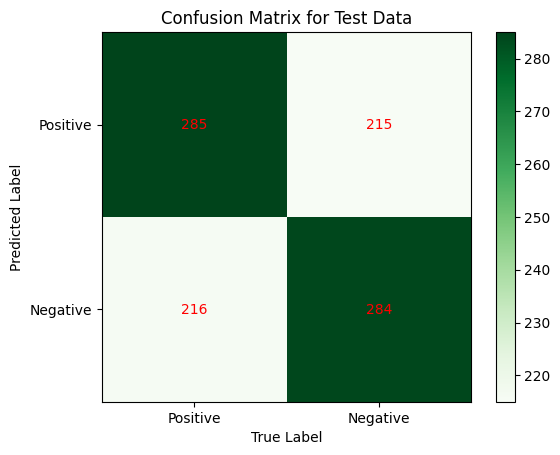

In [23]:
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.yticks([0, 1], ['Positive', 'Negative'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(test_conf_matrix[i, j]), ha='center', va='center', color='Red')
plt.show()


# the lab task is in the last cell


In this previous simple scenario both learning strategies achieve the same recognition rates in both training and test sets.
Note that similar words are shared between tweets. In practice, with real examples, tweets will include unstructured sentences and
abbreviations, making recognition harder.